# New Notebook

Whats this notebook about?

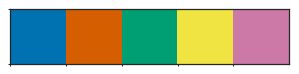

In [58]:
import string
import sys
import os
from glob import glob
import re

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from pysam import FastaFile
import matplotlib_logo as logo

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [196]:
%%bash
for ZIP in *.zip; do
  unzip $ZIP
done

Archive:  CB240717.zip
  inflating: CB240717/001_cb_32_A.ab1  
  inflating: CB240717/001_cb_32_A.seq  
  inflating: CB240717/002_cb_31_A.ab1  
  inflating: CB240717/002_cb_31_A.seq  
  inflating: CB240717/003_cb_29_A.ab1  
  inflating: CB240717/003_cb_29_A.seq  
  inflating: CB240717/004_cb_21_A.ab1  
  inflating: CB240717/004_cb_21_A.seq  
  inflating: CB240717/005_cb_20_A.ab1  
  inflating: CB240717/005_cb_20_A.seq  
  inflating: CB240717/006_cb_15_A.ab1  
  inflating: CB240717/006_cb_15_A.seq  
  inflating: CB240717/007_cb_12_A.ab1  
  inflating: CB240717/007_cb_12_A.seq  
  inflating: CB240717/008_cb_5_C.ab1  
  inflating: CB240717/008_cb_5_C.seq  
  inflating: CB240717/009_cb_31_B.ab1  
  inflating: CB240717/009_cb_31_B.seq  
  inflating: CB240717/010_cb_29_B.ab1  
  inflating: CB240717/010_cb_29_B.seq  
  inflating: CB240717/011_cb_21_B.ab1  
  inflating: CB240717/011_cb_21_B.seq  
  inflating: CB240717/012_cb_20_B.ab1  
  inflating: CB240717/012_cb_20_B.seq  
  inflating: CB2407

replace 017_cb_31_A.seq? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [197]:
%%bash
mv cb/* .
mv CB240717/* .
rmdir cb CB240717
rm *.ab1

In [198]:
ls

001_cb_16_A.seq  011_cb_21_B.seq  020_cb_13_B.seq
001_cb_32_A.seq  011_cb_22_A.seq  020_cb_21_B.seq
001_cb_8_A.seq   011_cb_6_B.seq   020_cb_6_A.seq
002_cb_15_A.seq  012_cb_20_B.seq  021_cb_12_B.seq
002_cb_31_A.seq  012_cb_21_A.seq  021_cb_20_B.seq
002_cb_7_A.seq   012_cb_5_B.seq   021_cb_2_A.seq
003_cb_14_A.seq  013_cb_15_B.seq  022_cb_11_B.seq
003_cb_29_A.seq  013_cb_20_A.seq  022_cb_19_B.seq
003_cb_6_A.seq   013_cb_4_B.seq   023_cb_10_B.seq
004_cb_13_A.seq  014_cb_12_B.seq  023_cb_18_B.seq
004_cb_21_A.seq  014_cb_19_A.seq  024_cb_17_B.seq
004_cb_5_A.seq   014_cb_35_B.seq  024_cb_9_B.seq
005_cb_12_A.seq  014_cb_3_B.seq   025_cb_32_B.seq
005_cb_20_A.seq  015_cb_18_A.seq  026_cb_31_B.seq
005_cb_4_A.seq   015_cb_2_B.seq   027_cb_27_B.seq
006_cb_11_A.seq  015_cb_34_B.seq  028_cb_23_B.seq
006_cb_15_A.seq  015_cb_35_A.seq  029_cb_6_B.seq
006_cb_3_A.seq   016_cb_17_A.seq  030_cb_2_B.seq
007_cb_10_A.seq  016_cb_1_B.seq   031_cb_37_A.seq
007_cb_12_A.seq  016_cb_32_B.seq  032_cb_32_A.seq
007_c

In [202]:
%%bash
rm sanger_products.fa
for seqfn in *.seq;
do
  echo ">${seqfn%%.seq}" >> sanger_products.fa
  cat $seqfn >> sanger_products.fa
done
head sanger_products.fa

>001_cb_16_A
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTNNNNNNNCNNNGGNGAATGNGAAGCTTAGTACTCAGTTTTTGGAGAANN
NNNNNNNGATGGTGGTGGTGGAGAACTGTAGACATATGGTGGTGGANGAGATTTGTACTCAACTTTAGGAGATGGTGAAT
AGTATGGTGGTGGTGGAGATTTATAATCAACTTTAGGCGNTGGNGAGTATTCTAGTGGTGGTGGTGGAGAACTGTAAACA
TCTGGTAATGGAGGAGATTTGTATTCCACTTTGGGANGTGGCACANAGTATGGTGGANGTGAGCTATCTGTGTATGGCTC
ATATGCCGCAACCATTGTTGCCATGATGATAACTCCTATAGCGTAGACGAGATGGGCAATCTTTCTAGAAGATCTCCTAC
AATATTCTCAGCTGCCATGGAAAATCGATGTTCTTCTTTTATTCTCTCAAGATTTTCAGGCTGTATATTAAAACTTATAT
TAAGAACTATGCTAACCACCTCATCANGAACCGTTGTAGGTGGCGTGGGTTTTCTTGGCAATCGACTCTCATGAAAACTA
CGAGCTNNNTATTCAATATGTTCCTCTTGACCAACTTTATTCTGNATTTTTTTTGAACGAGGTTTAGAGCAAGCTTCNNG
AAACTGANACAGGAANTTTATTAAAAATTTANATTTTGAAGAAAGTTCNNGNTTAATANCATCCATTTTTTGCTTTGCAA


BLASTn tabular output format 6
Column headers:
qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore

 1.	 qseqid	 query (e.g., gene) sequence id
 2.	 sseqid	 subject (e.g., reference genome) sequence id
 3.	 pident	 percentage of identical matches
 4.	 length	 alignment length
 5.	 mismatch	 number of mismatches
 6.	 gapopen	 number of gap openings
 7.	 qstart	 start of alignment in query
 8.	 qend	 end of alignment in query
 9.	 sstart	 start of alignment in subject
 10.	 send	 end of alignment in subject
 11.	 evalue	 expect value
 12.	 bitscore	 bit score

In [3]:
%%bash
source activate jupyter_python3
blat

blat - Standalone BLAT v. 36 fast sequence search command line tool
usage:
   blat database query [-ooc=11.ooc] output.psl
where:
   database and query are each either a .fa, .nib or .2bit file,
      or a list of these files with one file name per line.
   -ooc=11.ooc tells the program to load over-occurring 11-mers from
      an external file.  This will increase the speed
      by a factor of 40 in many cases, but is not required.
   output.psl is the name of the output file.
   Subranges of .nib and .2bit files may be specified using the syntax:
      /path/file.nib:seqid:start-end
   or
      /path/file.2bit:seqid:start-end
   or
      /path/file.nib:start-end
   With the second form, a sequence id of file:start-end will be used.
options:
   -t=type        Database type.  Type is one of:
                    dna - DNA sequence
                    prot - protein sequence
                    dnax - DNA sequence translated in six frames to protein
                  The default is dna.

In [203]:
%%bash
source activate jupyter_python3
blat -fine /home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa sanger_products.fa align.psl

Loaded 119667750 letters in 7 sequences
Searched 32283 bases in 81 sequences


In [2]:
%%bash
head align.psl

psLayout version 3

match	mis- 	rep. 	N's	Q gap	Q gap	T gap	T gap	strand	Q        	Q   	Q    	Q  	T        	T   	T    	T  	block	blockSizes 	qStarts	 tStarts
     	match	match	   	count	bases	count	bases	      	name     	size	start	end	name     	size	start	end	count
---------------------------------------------------------------------------------------------------------------------------------------------------------------
320	0	0	20	0	0	1	2724	+	001_cb_16_A	1211	38	378	3	23459830	10700854	10703918	2	94,246,	38,132,	10700854,10703672,
77	7	0	1	0	0	0	0	-	001_cb_16_A	1211	91	176	3	23459830	20206852	20206937	1	85,	1035,	20206852,
231	1	0	13	0	0	2	1165	-	001_cb_32_A	324	23	268	1	30427671	4071197	4072607	3	126,84,35,	56,182,266,	4071197,4071324,4072572,
105	5	0	70	1	1	1	1	-	001_cb_8_A	281	25	206	1	30427671	8391185	8391366	3	80,93,7,	75,155,249,	8391185,8391266,8391359,
164	0	0	50	0	0	0	0	-	002_cb_31_A	325	52	266	1	30427671	4071197	4071411	1	214,	59,	4071197,


In [45]:
header = !paste -d " " <(sed '3q;d' align.psl | tr '\t' '\n') \
                       <(sed '4q;d' align.psl | tr '\t' '\n')
header = [re.sub('\s+', '', re.sub('[' + string.punctuation + ']', '', x)).lower()
          for x in header]
psl = pd.read_table('align.psl',
                    sep='\s+',
                    header=None,
                    skiprows=5,
                    names=header)
# filter for spliced
psl = psl[psl['blockcount'] > 1]
psl.head()

,match,mismatch,repmatch,ns,qgapcount,qgapbases,tgapcount,tgapbases,strand,qname,...,qstart,qend,tname,tsize,tstart,tend,blockcount,blocksizes,qstarts,tstarts
0,320,0,0,20,0,0,1,2724,+,001_cb_16_A,...,38,378,3,23459830,10700854,10703918,2,"94,246,","38,132,","10700854,10703672,"
2,231,1,0,13,0,0,2,1165,-,001_cb_32_A,...,23,268,1,30427671,4071197,4072607,3,"126,84,35,","56,182,266,","4071197,4071324,4072572,"
3,105,5,0,70,1,1,1,1,-,001_cb_8_A,...,25,206,1,30427671,8391185,8391366,3,"80,93,7,","75,155,249,","8391185,8391266,8391359,"
7,338,8,0,12,1,19,1,3,+,005_cb_12_A,...,50,427,2,19698289,1528130,1528491,3,"182,26,150,","50,232,277,","1528130,1528315,1528341,"
8,274,14,0,10,2,88,2,116,+,005_cb_12_A,...,53,439,5,26975502,1389439,1389853,3,"175,30,93,","53,229,346,","1389439,1389618,1389760,"


In [73]:
def get_splice_sites(psl):
    for _, chrom, start, blocksizes, blockstarts in psl[['tname', 'tstart', 'blocksizes', 'tstarts']].itertuples():
        blocksizes = np.fromstring(blocksizes, dtype=np.uint, sep=',')
        blockstarts = np.fromstring(blockstarts, dtype=np.uint, sep=',')
        intron_starts = (blockstarts + blocksizes)[:-1]
        intron_ends = blockstarts[1:]
        for start, end in zip(intron_starts, intron_ends):
            if end - start > 30:
                yield chrom, start, end

introns = set(get_splice_sites(psl))
introns = pd.DataFrame(
    [x for x in introns if (x[2] - x[1]) > 30],
    columns=['chrom', 'start', 'end'],
)
introns.head()

,chrom,start,end
0,3,6865094,6865198
1,3,10700910,10703761
2,3,10700929,10703680
3,3,20201261,20201486
4,1,4071441,4072314


In [66]:
lrx1_inv = !grep AT1G12040 /home/matthew/Documents/genomes/tair10/gff/araport11_genes.bed | cut -f-3
lrx1_inv = lrx1_inv[0].split('\t')

ext9_inv = !grep AT3G28550 /home/matthew/Documents/genomes/tair10/gff/araport11_genes.bed | cut -f-3
ext9_inv = ext9_inv[0].split('\t')
lrx1_inv, ext9_inv

(['1', '4069992', '4072681'], ['3', '10700562', '10704018'])

In [82]:
((introns.end) < int(lrx1_inv[2])) & (introns.chrom.astype(str) == lrx1_inv[0])

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
dtype: bool

In [84]:
lrx1_introns = introns[(introns.chrom.astype(str) == lrx1_inv[0]) & (introns.start > int(lrx1_inv[1])) & (introns.end < int(lrx1_inv[2]))]
ext9_introns = introns[(introns.chrom.astype(str) == ext9_inv[0]) & (introns.start > int(ext9_inv[1])) & (introns.end < int(ext9_inv[2]))]
lrx1_introns

,chrom,start,end
4,1,4071441,4072314
9,1,4071408,4072572
10,1,4071408,4072573
12,1,4071477,4072305
20,1,4071378,4072275
25,1,4071296,4072261


In [87]:
!grep AT1G12040 /home/matthew/Documents/genomes/tair10/gff/araport11_genes.bed

1	4069992	4072681	AT1G12040	.	+


In [93]:
def revcomp(seq):
    comp = dict(A='T', T='A', C='G', G='C')
    return ''.join([comp[b] for b in seq.upper()][::-1])

fasta = FastaFile('/home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa')
lrx1_intron_seqs = []
n = 8
for _, chrom, start, end in lrx1_introns.itertuples():
    inv1 = fasta.fetch(str(chrom), start - n, start + n).upper()
    inv2 = fasta.fetch(str(chrom), end - n, end + n).upper()
    lrx1_intron_seqs.append([inv1, inv2])

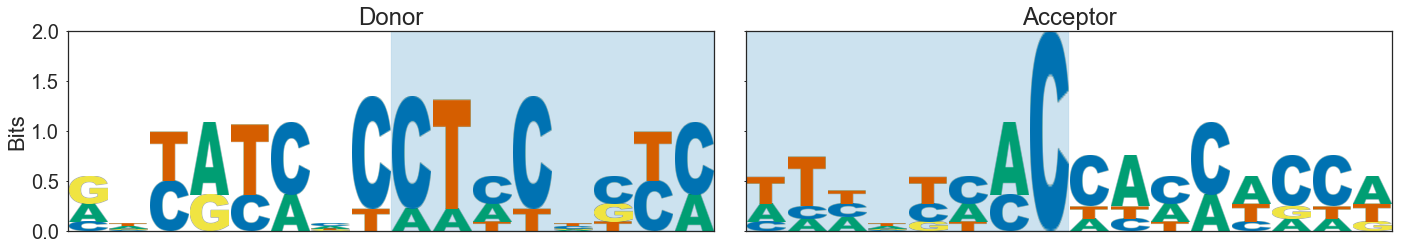

In [94]:
donors, acceptors = zip(*lrx1_intron_seqs)
fig, axes = plt.subplots(figsize=(20, 4), ncols=2, sharey=True)
ax1, ax2 = axes.ravel()
logo.draw_logo(donors, ax=ax1)
logo.draw_logo(acceptors, ax=ax2)
ax1.set_title('Donor')
ax2.set_title('Acceptor')
ax2.set_ylabel('')
ax1.set_ylim(0, 2)
ax1.axvspan(8, 16, alpha=0.2, color=pal[0], zorder=0)
ax2.axvspan(0, 8, alpha=0.2, color=pal[0], zorder=0)
plt.tight_layout()
plt.savefig('lrx1_sanger_splice_junction_logos.svg')
plt.show()

In [97]:
ext9_intron_seqs = []
n = 8
for _, chrom, start, end in ext9_introns.itertuples():
    inv1 = fasta.fetch(str(chrom), start - n, start + n).upper()
    inv2 = fasta.fetch(str(chrom), end - n, end + n).upper()
    ext9_intron_seqs.append([revcomp(inv2), revcomp(inv1)])

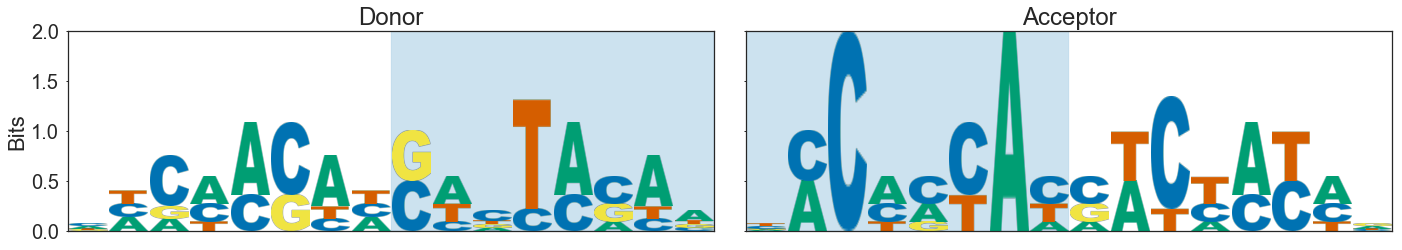

In [98]:
donors, acceptors = zip(*ext9_intron_seqs)
fig, axes = plt.subplots(figsize=(20, 4), ncols=2, sharey=True)
ax1, ax2 = axes.ravel()
logo.draw_logo(donors, ax=ax1)
logo.draw_logo(acceptors, ax=ax2)
ax1.set_title('Donor')
ax2.set_title('Acceptor')
ax2.set_ylabel('')
ax1.set_ylim(0, 2)
ax1.axvspan(8, 16, alpha=0.2, color=pal[0], zorder=0)
ax2.axvspan(0, 8, alpha=0.2, color=pal[0], zorder=0)
plt.tight_layout()
plt.savefig('ext9_sanger_splice_junction_logos.svg')
plt.show()